# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Vovella
- **Email:** vovella04@gmail.com
- **ID Dicoding:** vovella_DjBW

## Menentukan Pertanyaan Bisnis

- Pada musim apa rental bike memiliki jumlah rental tertinggi untuk masing-masing user yang terdaftar dan yang tidak?
- Kondisi cuaca mana yang memiliki jumlah rental bike tertinggi?
- Apakah temperature dan feelings temperature memengaruhi jumlah rental?

## Import Semua Packages/Library yang Digunakan

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

> Importing 'day.csv' and 'hour.csv'



1. Mounting Google Drive to access the 'day.csv' and 'hour.csv' file

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Loading the 'day.csv' dataset

In [32]:
day_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/day.csv', delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3. Loading the 'hour.csv' dataset

In [33]:
hour_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hour.csv', delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Day.csv and hour.csv have almost the same amount and type of fields, except there is extra field for "hr" in hour.csv

### Assessing Data



1. Checking **the data type** of **day_df** and **hour_df**


> **day_df**

In [34]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


> **hour_df**

In [35]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Checking if there is any **missing value** on **day_df** or **hour_df**

> **day_df**



In [36]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


> **hour_df**

In [37]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


3. Checking if there is any **duplicate data** in **day_df** and **hour_df**

> **day_df**

In [38]:
day_df.duplicated().sum()

0

> **hour_df**

In [39]:
hour_df.duplicated().sum()

0

4. Checking if there is any **abnormality** in **day_df** and **hour_df**

> **day_df**

In [40]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


> **hour_df**

In [41]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- **dteday** type in both day_df and hour_df should be **datetime**, not **object**
- 0 missing value in both day_df and hour_df
- 0 duplicated data in both day_df and hour_df
- No abnormalities value in both day_df and hour_df

### Cleaning Data

1. Changing **dteday  data types** in **day_df** and **hour_df**

In [42]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df['dteday'] = day_df['dteday'].dt.date
hour_df['dteday'] = hour_df['dteday'].dt.date

2. Renaming columns and some details in **day_df** and **hour_df**

In [43]:
new_column_names = {
    'instant': 'id',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day_of_week',
    'workingday': 'working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_temperature',
    'hum': 'humidity',
    'cnt': 'count'
}

day_df.rename(columns=new_column_names, inplace=True)
hour_df.rename(columns=new_column_names, inplace=True)
hour_df.rename(columns={'hr': 'hour'}, inplace=True)

# Converting each number values to it's corresponding meaning:
# season → 1:Spring, 2:Summer, 3:Fall, 4:Winter
# year → 0:2011, 1:2012
# month → 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
# weather_condition → 1:Clear, 2:Misty, 3:Light_precipitation 4:Heavy_precipitation
# day_of_week → 0:Sunday, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, 6:Saturday
# year → 0:2011, 1:2012

day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

day_df.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_precipitation','Heavy_precipitation'), inplace=True)
hour_df.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_precipitation','Heavy_precipitation'), inplace=True)

day_df.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

day_df.head()

,id,date,season,year,month,holiday,day_of_week,working_day,weather_condition,temperature,feels_temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
hour_df.head()

,id,date,season,year,month,hour,holiday,day_of_week,working_day,weather_condition,temperature,feels_temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **dteday** data types issue **cleared**
- Header of column **renamed**
- All number values **converted** to it's meaning, making it more **humanly** and **readable**

## Exploratory Data Analysis (EDA)



### Explore

In [45]:
day_df.describe(include="all")

,id,date,season,year,month,holiday,day_of_week,working_day,weather_condition,temperature,feels_temperature,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,2012,Jan,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [46]:
hour_df.describe(include="all")

,id,date,season,year,month,hour,holiday,day_of_week,working_day,weather_condition,temperature,feels_temperature,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,2012,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [47]:
#Calculating the total rental count for each season in day_df
season_cas_df=day_df.groupby(by="season", observed=False)['casual'].sum().sort_values(ascending=False).reset_index()
season_reg_df=day_df.groupby(by="season", observed=False)['registered'].sum().sort_values(ascending=False).reset_index()

season_df = season_cas_df.set_index('season').join(season_reg_df.set_index('season'))

season_df.head()

,casual,registered
season,,
Fall,226091,835038
Summer,203522,715067
Winter,129782,711831
Spring,60622,410726


> Dari tabel ini, dapat disimpulkan bahwa **musim** dengan jumlah rental tertinggi ialah **Fall** untuk kategori user casual maupun register.

In [48]:
weather_d_df = day_df.groupby(by="weather_condition", observed=False)['count'].sum().sort_values(ascending=False).reset_index()
weather_d_df.head()

,weather_condition,count
0,Clear,2257952
1,Misty,996858
2,Light_precipitation,37869


> Dari tabel ini, dapat disimpulkan bahwa **cuaca** dengan jumlah rental tertinggi ialah **Clear** dengan total rental 2.257.952, disusul oleh misty dan light precipitation (rain, snow, thunder). Namun, dikarenakan tidak ada cuaca yang "heavy", maka akan dicoba untuk menganalisis ulang dengan dataset **hour.csv**

In [49]:
# From what I observed, I believe that the hourly data for weather situation is more accurate than day data as weather is changing continuously
weather_h_df = hour_df.groupby(by="weather_condition", observed=False)['count'].sum().sort_values(ascending=False).reset_index()
weather_h_df.head()

,weather_condition,count
0,Clear,2338173
1,Misty,795952
2,Light_precipitation,158331
3,Heavy_precipitation,223


> Dari tabel ini, dapat disimpulkan bahwa **cuaca** dengan jumlah rental tertinggi ialah **Clear** dengan total rental 2.338.173, disusul oleh misty, light precipitation (rain, snow, thunder), dan heavy precipitation (rain, snow, thunder).

In [50]:
temp_ftemp_df = day_df[['temperature', 'feels_temperature', 'count']].corr()
temp_ftemp_df.head()

,temperature,feels_temperature,count
temperature,1.000000,0.991702,0.627494
feels_temperature,0.991702,1.000000,0.631066
count,0.627494,0.631066,1.000000


> Dari tabel ini, dapat disimpulkan bahwa **temperature dan feels_temperature** memiliki nilai **0.627494 dan 0.631066** terhadap **jumlah rental/count**, yang artinya sama-sama memiliki korelasi **moderate positive** dengan feels_temperature sedikit lebih tinggi kemungkinannya memengaruhi jumlah rental/count dibandingkan temperature.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa rental bike memiliki jumlah rental tertinggi untuk masing-masing user yang terdaftar dan yang tidak?

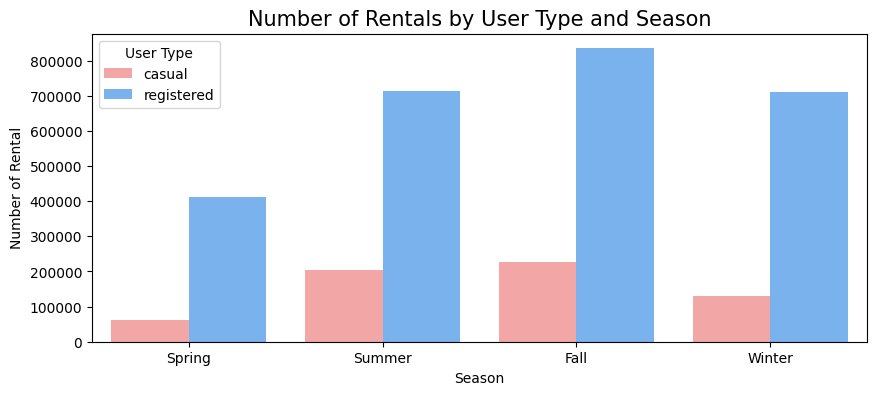

In [51]:
season_order = ["Spring", "Summer", "Fall", "Winter"]

sorted_day_df = day_df.copy()
sorted_day_df["season"] = pd.Categorical(sorted_day_df["season"], categories=season_order, ordered=True)

melted_df = pd.melt(sorted_day_df, id_vars="season", value_vars=["registered", "casual"], var_name="user_type", value_name="rentals")

season_plot_df = melted_df.groupby(["season", "user_type"], observed=False, as_index=False).sum()

colors_ = ["#FF9999", "#66B2FF"]

plt.figure(figsize=(10, 4))
sns.barplot(
    y="rentals",
    x="season",
    hue="user_type",
    data=season_plot_df,
    palette=colors_
)
plt.title("Number of Rentals by User Type and Season", loc="center", fontsize=15)
plt.ylabel("Number of Rental")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=10)
plt.legend(title="User Type")
plt.show()

Dari bar chart di atas, dapat disimpulkan bahwa:
1. Urutan musim dengan rental terbanyak untuk tipe user yang terdaftar: Fall, Summer, Winter, dan Spring
2. Urutan musim dengan rental terbanyak untuk tipe user casual: Fall, Summer, Winter, dan Spring

### Pertanyaan 2: Kondisi cuaca mana yang memiliki jumlah rental bike tertinggi?

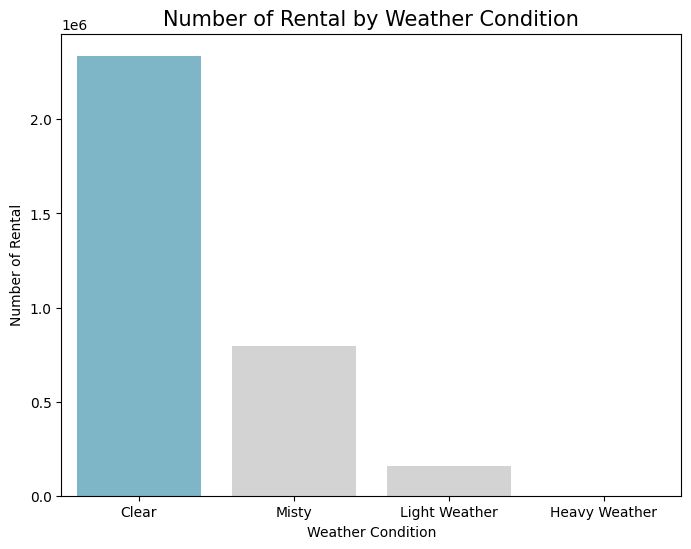

,weather_condition,count
0,Clear,2338173
1,Heavy_precipitation,223
2,Light_precipitation,158331
3,Misty,795952


In [52]:
weather_order = ["Clear", "Misty", "Light_precipitation", "Heavy_precipitation"]

weather_plot_df = hour_df.groupby("weather_condition", observed=False)["count"].sum().reset_index()
weather_plot_df["weather_condition"] = pd.Categorical(weather_plot_df["weather_condition"], categories=weather_order, ordered=True)

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(8, 6))
sns.barplot(
    y="count",
    x="weather_condition",
    hue="weather_condition",
    data=weather_plot_df,
    palette=colors_
)

plt.title("Number of Rental by Weather Condition", loc="center", fontsize=15)
plt.ylabel("Number of Rental")
plt.xlabel("Weather Condition")
plt.xticks(ticks=range(len(weather_order)), labels=["Clear", "Misty", "Light Weather", "Heavy Weather"])
plt.tick_params(axis='x', labelsize=10)
plt.show()

weather_plot_df.head()

Dari bar chart di atas, dapat disimpulkan bahwa:
1. Cuaca dengan jumlah rental tertinggi ialah cuaca Clear
2. Cuaca dengan jumlah rental terendah ialah cuaca Heavy Rain/Snow/Thunder

### Pertanyaan 3: Apakah temperature dan feelings temperature memengaruhi jumlah rental?

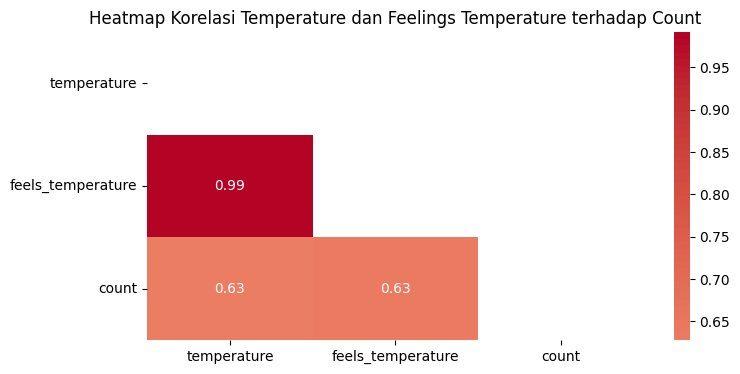

In [53]:
fig, ax = plt.subplots(figsize=(8,4))
correlation_matrix = day_df[['temperature', 'feels_temperature', 'count']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Heatmap Korelasi Temperature dan Feelings Temperature terhadap Count")
plt.show()

Dari heat map di atas, dapat disimpulkan bahwa terdapat korelasi positif yang cukup kuat antara jumlah penyewaan sepeda dengan temperature dan feelings temperature, dengan nilai korelasi sebesar 0,63 (moderate positive).
Artinya, ketika temperature dan feelings temperature meningkat, jumlah penyewaan sepeda cenderung meningkat, begitu pula sebaliknya.

## Conclusion

- Conclution pertanyaan 1: Pada musim apa rental bike memiliki jumlah rental tertinggi untuk masing-masing user yang terdaftar dan yang tidak?
> Musim Fall adalah musim dengan jumlah rental tertinggi untuk tipe user yang terdaftar maupun tidak.
- Conclution pertanyaan 2: Kondisi cuaca mana yang memiliki jumlah rental bike tertinggi?
> Cuaca Clear adalah cuaca dengan jumlah rental tertinggi.
- Conclution pertanyaan 3: Apakah temperature dan feelings temperature memengaruhi jumlah rental?
> Ya. Temperature dan feelings temperature cukup memengaruhi jumlah rental/

## Analisis Lanjutan

### Clustering

> Total rental berdasarkan wind speed

In [54]:
hour_df['windspeed_category'] = pd.cut(hour_df['windspeed'],
                                           bins=[-0.1, 0.2, 0.4, 1.1],
                                           labels=['Low', 'Medium', 'High'])

hour_df.groupby('windspeed_category', observed=False)['count'].sum().reset_index()

,windspeed_category,count
0,Low,1804656
1,Medium,1297390
2,High,190633


In [55]:
day_df.to_csv("day.csv", index=False)
hour_df.to_csv("hour.csv", index=False)